# Novelty Detection

In [1]:
!pwd

/ifs/groups/rosenMRIGrp/sr3622/project_grp/github


In [6]:
embeddings= np.load("test_embedding.npy")

In [7]:
indices=meta[meta["type"]=="out_domain"].index

In [8]:
out_emebdding = embeddings[indices]
out_distance = distance[indices]

In [9]:
out_distance.shape

(7176, 165615)

In [10]:
meta[meta["type"]=="out_domain"].phylum.nunique()

19

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score, homogeneity_score



meta_out = meta[meta["type"]=="out_domain"]
# Clustering
kmeans = KMeans(n_clusters=40)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(out_emebdding)

# Calculate clustering metrics
completeness = completeness_score(meta_out['phylum'], clusters)
homogeneity = homogeneity_score(meta_out['phylum'], clusters)

print("Completeness:", completeness)
print("Homogeneity:", homogeneity)


/ifs/opt/python/gcc/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Completeness: 0.3617460879667995
Homogeneity: 0.47325864425035724


In [13]:
# Calculate clustering metrics
completeness = completeness_score(meta_out['family'], clusters)
homogeneity = homogeneity_score(meta_out['family'], clusters)

print("Completeness:", completeness)
print("Homogeneity:", homogeneity)

Completeness: 0.47698496833527776
Homogeneity: 0.49791320439043396


In [14]:


meta_out = meta[meta["type"]=="out_domain"]
# Clustering
kmeans = KMeans(n_clusters=40)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(out_distance)

# Calculate clustering metrics
completeness = completeness_score(meta_out['phylum'], clusters)
homogeneity = homogeneity_score(meta_out['phylum'], clusters)

print("Completeness:", completeness)
print("Homogeneity:", homogeneity)


/ifs/opt/python/gcc/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Completeness: 0.10525586524073842
Homogeneity: 0.08263468717847329


In [18]:
# Calculate clustering metrics
completeness = completeness_score(meta_out['family'], clusters)
homogeneity = homogeneity_score(meta_out['family'], clusters)

print("Completeness:", completeness)
print("Homogeneity:", homogeneity)

Completeness: 0.16782583945057658
Homogeneity: 0.10513060134786797


# Sorting Distance

In [54]:
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [37]:
distance= np.load("faiss_embeddings_distance_matrix.npy")
indices= np.load("faiss_embeddings_index_matrix.npy")

In [43]:
# Get the shape of the indices array
num_rows, num_cols = indices.shape

desired_dtype = np.float32 
# Create a new array with the same shape as indices
new_array = np.empty((num_rows, num_cols), dtype=desired_dtype)

# Populate the new array based on indices and distances
for i in range(num_rows):
    for j in range(num_cols):
        new_array[i, indices[i, j]] = distance[i,j]


In [44]:
np.save("faiss_embeddings_distance_matrix_order_.npy",new_array)

# Novelty Detection

In [2]:
import pandas as pd
import numpy as np

In [2]:
distance= np.load("faiss_distance_matrix.npy")

In [3]:
# distance.shape

In [4]:
# distance[0]

In [5]:
indices= np.load("faiss_embeddings_index_matrix.npy")

In [ ]:
# indices1 = indices

In [ ]:
import pandas as pd
import numpy as np
meta = pd.read_csv("metadata_test.csv")
meta_db = pd.read_csv("metadata_db.csv")
meta["type"] = np.where(meta["phylum"].isin(meta_db["phylum"]), "in_domain", "out_domain")


In [8]:
# Get the shape of the indices array
num_rows, num_cols = indices.shape

# Create a new array with the same shape as indices
new_array = np.empty((num_rows, num_cols))

# Populate the new array based on indices and distances
for i in tqdm(range(num_rows)):
    for j in range(num_cols):
        new_array[i, j] = distance[i, indices[i, j]]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14256/14256 [22:04<00:00, 10.76it/s]


In [10]:
np.save("Triplet_faiss_index_matrix_order_2.npy",new_array)

In [10]:
new_array = np.load("scann_distance_order2.npy")

In [11]:
new_array

array([[8.86533737, 8.91193581, 8.75869656, ..., 8.82769108, 8.82397652,
        8.89188385],
       [8.90093422, 8.88556767, 8.88730049, ..., 8.732584  , 8.72224617,
        8.8213768 ],
       [8.81629467, 8.78522968, 8.7541132 , ..., 8.81508732, 8.82008553,
        8.85230446],
       ...,
       [8.91497231, 8.85231686, 8.84766865, ..., 8.86683941, 8.9368248 ,
        8.93097687],
       [8.89512539, 8.80916595, 8.84673023, ..., 8.85980606, 8.90606689,
        8.91441154],
       [8.8659029 , 8.87347794, 8.79570293, ..., 8.85475349, 8.85982609,
        8.90740681]])

In [12]:
avg_array = np.min(new_array,axis=1)

In [13]:
meta = pd.read_csv("metadata_test.csv")
meta_db = pd.read_csv("metadata_db.csv")
meta["type"] = np.where(meta["phylum"].isin(meta_db["phylum"]), "in_domain", "out_domain")


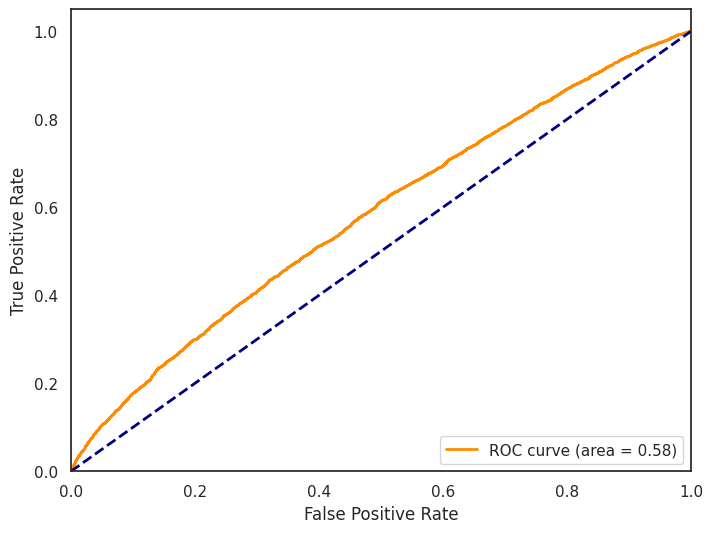

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Create a DataFrame with the data and labels
data = {'Values': avg_array, 'Category': list(meta["type"])}
df = pd.DataFrame(data)

# Convert category labels to binary format
df['Category'] = df['Category'].map({'in_domain': 0, 'out_domain': 1})

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df['Category'], df['Values'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('rocc_scann.pdf', format='pdf', dpi=200, bbox_inches='tight', pad_inches=0.1)# Show the plot
# Show plot
plt.show()


In [16]:
# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 7.347752571105957


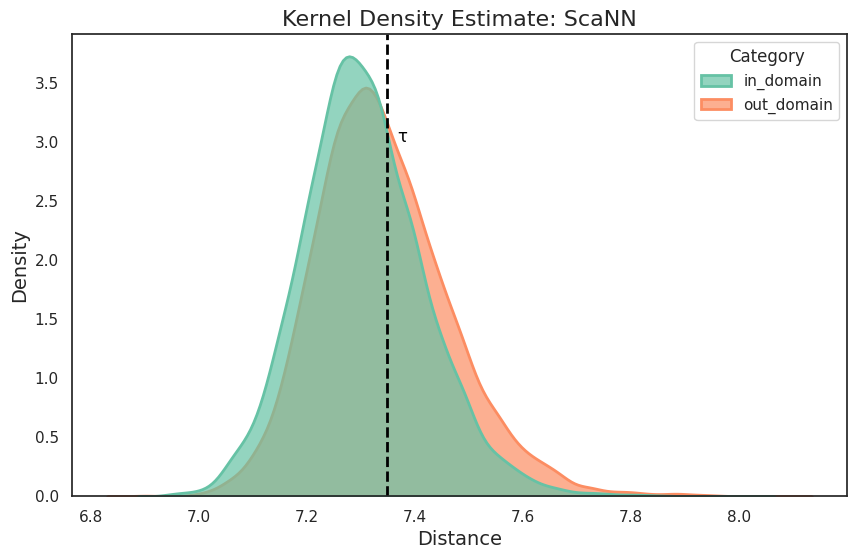

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a DataFrame with the data and labels
data = {'Values': avg_array, 'Category': list(meta["type"])}
df = pd.DataFrame(data)

# Set a seaborn style for better aesthetics
sns.set(style="white")

# Create a KDE plot for each category using seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Values", hue="Category", fill=True, common_norm=False, palette="Set2", alpha=0.7, linewidth=2)

# Set plot labels and title
plt.title('Kernel Density Estimate: ScaNN', fontsize=16)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Density', fontsize=14)


# Add a dashed line for estimated distinction
estimated_distinction = optimal_threshold # Adjust this value based on your estimation
plt.axvline(x=estimated_distinction, color='black', linestyle='--', linewidth=2, label='Estimated Distinction')
plt.text(estimated_distinction + 0.02, 3, f'\u03C4', fontsize=12, color='black')
plt.savefig('kde_scann.pdf', format='pdf', dpi=200, bbox_inches='tight', pad_inches=0.1)# Show the plot

# Show the plot
plt.show()


# Umap

In [33]:
!sbatch umap.sh

Submitted batch job 9832709


In [6]:
import pandas as pd
import numpy as np

In [35]:
umap_results.shape

(14256, 2)

In [36]:

meta = pd.read_csv("metadata_test.csv")
meta_db = pd.read_csv("metadata_db.csv")
meta["type"] = np.where(meta["phylum"].isin(meta_db["phylum"]), "in_domain", "out_domain")


In [26]:
umap_results = np.load("umap_results_scann_distance_order2.npy")

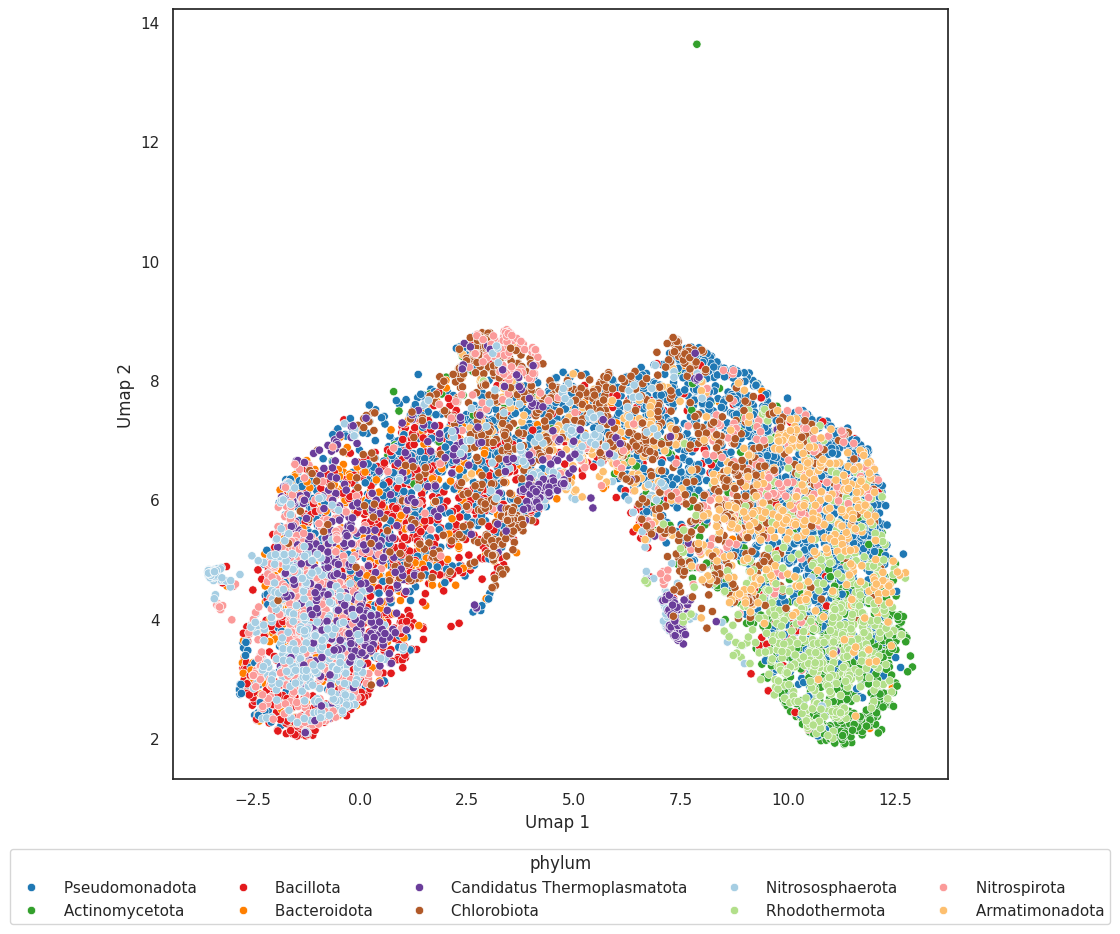

CPU times: user 1.34 s, sys: 732 ms, total: 2.07 s
Wall time: 1.35 s


In [29]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

color="phylum"

# Assuming 'umap_results' and 'meta' are your data arrays
# Convert them to a DataFrame for easier plotting
data = pd.DataFrame({'PC1': umap_results[:, 0], 'PC2': umap_results[:, 1], 'type': meta["type"], "gene": meta["gene"], "phylum": meta["phylum"],"kingdom": meta["kingdom"]})

# Identify the 10 most common phyla
top_phyla = data[color].value_counts().nlargest(10).index

# Filter the data for the top 10 phyla
filtered_data = data[data[color].isin(top_phyla)]
# filtered_data=data
# Set a seaborn style for better aesthetics
sns.set(style="white")

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 10))

custom_colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f"]

scatter_plot = sns.scatterplot(x='PC1', y='PC2', hue=color, data=filtered_data, palette=custom_colors)
# scatter_plot = sns.scatterplot(x='PC1', y='PC2', hue='phylum', data=filtered_data, palette='viridis')

# Set plot labels and title
scatter_plot.set(xlabel='Umap 1 ', ylabel='Umap 2')

# Place legend at the bottom, in multiple rows (adjust ncol and bbox_to_anchor as needed)
plt.legend(title=color, bbox_to_anchor=(0.5, -0.08), loc='upper center', ncol=5)

# Save the figure with adjustments for the legend
plt.savefig(f'{color}_scann.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [ ]:
# X_train is  dataframe db 
# X_test is  dataframe test 
X_train = pd.read_csv("metadata_db.csv")

In [ ]:
# the following analysis is for the best hit 


In [ ]:
import faiss
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef


# Initialize the FAISS index
index = faiss.IndexFlatL2(train_embedding.shape[1])

# Train the index on the training embeddings
index.add(train_embedding)

# Define a function to search for the nearest neighbors based on embeddings
def search_nearest_neighbors(query_embedding, k=1):
    distances, indices = index.search(query_embedding, k)
    return  indices


nearest_indices = search_nearest_neighbors(test_embedding)
# Assuming each test embedding corresponds to a single label in the training data
predicted_label = X_train.iloc[nearest_indices.reshape(-1)]["gene"]


# Calculate accuracy
accuracy = accuracy_score(X_test["gene"], predicted_label)
print(f'Accuracy: {accuracy}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(X_test["gene"], predicted_label)

# Calculate MCC, sensitivity, and specificity
mcc = matthews_corrcoef(X_test["promotor"], predicted_label)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print(f'MCC: {mcc}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

In [ ]:

import torch
from sklearn import manifold
tsne_config = {
    "n_components": 2,
    "n_jobs": 20,
    "perplexity": 50,
    "verbose": True,
    "n_iter": 1000,
    "learning_rate": 'auto',
    "init": 'pca',
    "random_state": 42

}


tsne_result = manifold.TSNE(**tsne_config).fit_transform(embedding)


#Perform t-SNE dimensionality reduction for triplet embeddings
# tsne_base_line_embedding = manifold.TSNE(**tsne_config).fit_transform(base_line_embedding)
# triplet_tsne_base_line_embedding = manifold.TSNE(**tsne_config).fit_transform(triplet_base_line_embedding)


In [ ]:
tsne_result.shape

In [ ]:
import matplotlib.pyplot as plt

# Set up a 2x2 grid for the plots
fig, axs = plt.subplots(1, 1, figsize=(14, 14))


axs.scatter(tsne_result[:, 0], tsne_result[:, 1],  marker='o', edgecolors='black', alpha=0.7)


In [ ]:
import pandas as pd

# Read CSV file into a DataFrame
panther_gene = pd.read_csv("pantherGeneList (8).txt", sep="\t", header=None)

# Rename columns
panther_gene.rename(columns={4: "Protein Class", 1: 'gene'}, inplace=True)

# Remove parentheses from 'Protein Class' column
panther_gene['Protein Class'] = panther_gene['Protein Class'].replace(to_replace=r'\([^)]*\)', value='', regex=True).str.strip()
# panther_gene = panther_gene.dropna()

panther_gene['gene'] = panther_gene['gene'].replace('groeL', 'groL')
panther_gene.loc[panther_gene['gene'] == 'groL', 'Protein Class'] = 'Chaperonin GroEL'

panther_gene.loc[panther_gene['gene'] == 'ftsZ', 'Protein Class'] = 'Cell division protein'

panther_gene = pd.concat([panther_gene, pd.DataFrame({'gene': ['tyrS'], 'Protein Class': ['aminoacyl-tRNA synthetase']})], ignore_index=True)


# Keep only the "gene" and "Protein Class" columns and remove duplicate rows
panther_gene = panther_gene[["gene", "Protein Class"]].drop_duplicates(subset='gene')


In [ ]:

df_gene_out = pd.DataFrame({'index_train': I_p.squeeze(), 'distance': D_p.squeeze(), 'gene': X_gene_out['gene']})
df_gene_out = pd.merge(df_gene_out, panther_gene, on='gene', how='left')


In [ ]:
df_gene_out["gene_train"]=[X_train.iloc[i]["gene"] for i in df_gene_out.index_train]

In [ ]:
import pandas as pd

# Read CSV file into a DataFrame
panther_gene = pd.read_csv("pantherGeneList (7).txt", sep="\t", header=None)

# Rename columns
panther_gene.rename(columns={4: "Protein Class_train", 1: 'gene_train'}, inplace=True)

# Remove parentheses from 'Protein Class' column
panther_gene['Protein Class_train'] = panther_gene['Protein Class_train'].replace(to_replace=r'\([^)]*\)', value='', regex=True).str.strip()
# panther_gene = panther_gene.dropna()

panther_gene['gene_train'] = panther_gene['gene_train'].replace('groeL', 'groL')
panther_gene.loc[panther_gene['gene_train'] == 'groL', 'Protein Class_train'] = 'Chaperonin GroEL'

panther_gene.loc[panther_gene['gene_train'] == 'ftsZ', 'Protein Class_train'] = 'Cell division protein'

panther_gene = pd.concat([panther_gene, pd.DataFrame({'gene_train': ['tyrS'], 'Protein Class_train': ['aminoacyl-tRNA synthetase']})], ignore_index=True)


# Keep only the "gene" and "Protein Class" columns and remove duplicate rows
panther_gene = panther_gene[["gene_train", "Protein Class_train"]].drop_duplicates(subset='gene_train')


In [ ]:
df_gene_out = pd.merge(df_gene_out, panther_gene, on='gene_train', how='left')

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_gene_out.dropna(subset=['Protein Class', 'Protein Class_train'], inplace=True)


# Assuming df_gene_out is your DataFrame
df_gene_out[['Protein Class', 'Protein Class_train']] = df_gene_out[['Protein Class', 'Protein Class_train']].astype(str)

# # Filter out rows where "Protein Class" values are not in "Protein Class_train"
filtered_rows = df_gene_out[df_gene_out['Protein Class_train'].isin(df_gene_out['Protein Class'])]
# filtered_rows = filtered_rows[filtered_rows['Protein Class_train'].isin(filtered_rows['Protein Class'])]
# filtered_rows = df_gene_out
# Compare Protein Class and Protein Class_train columns
predicted_classes = filtered_rows['Protein Class_train']
actual_classes = filtered_rows['Protein Class']

# Calculate accuracy
accuracy = accuracy_score(actual_classes, predicted_classes)


print(predicted_classes.nunique())
print(actual_classes.nunique())

# Display accuracy
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(actual_classes, predicted_classes)

# Display confusion matrix using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(predicted_classes.unique()), yticklabels=sorted(actual_classes.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification report
class_report = classification_report(actual_classes, predicted_classes)
print("Classification Report:\n", class_report)


In [ ]:
class_report

In [ ]:
filtered_rows[filtered_rows['Protein Class'] == filtered_rows['Protein Class_train']]["Protein Class"].value_counts()

In [ ]:
predicted_classes.value_counts()

In [ ]:
actual_classes.value_counts()

In [ ]:
# dict_for_each_phylum = {}
# dict_for_each_order = {}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import sys
import faiss
from tqdm import tqdm

# Initialize dictionaries to store upper triangle distances for each level
distance_dict = {}

# Specify the taxonomy levels you want to consider
taxonomy_levels = ["phylum", "class", "order", "family", "genus"]

# Initialize an empty list to store upper triangle distances
for level in taxonomy_levels:
    distance_dict[level] = []

for level in taxonomy_levels:
    for value in tqdm(X_train[level].unique()):
        # Filter triplet_embedding_train based on indices in X_train with the current taxonomy level value
        filtered_triplet_embedding_train = triplet_embedding_train[X_train[level] == value]

        num_features = 512

        # Initialize Faiss index
        cpu_index = faiss.IndexFlatL2(num_features)

        # Add filtered_triplet_embedding_train to the index
        cpu_index.add(filtered_triplet_embedding_train)

        # Measure time for search operation
        start_time = time.time()
        D_p, I_p = cpu_index.search(filtered_triplet_embedding_train, len(filtered_triplet_embedding_train))
        elapsed_time = time.time() - start_time

        # Consider only upper triangle distances and flatten them
        distance_dict[level].extend(D_p.ravel())

# # Plot all levels on the same plot
# plt.figure(figsize=(12, 8))

# for level, distances in distance_dict.items():
#     sns.histplot(distances, kde=True, label=level)

# # Add labels and title
# plt.xlabel('Distance')
# plt.ylabel('Density')
# plt.title('Histogram of Upper Triangle Distances for Different Taxonomy Levels')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import os
# import numpy as np
# from sklearn.metrics.pairwise import euclidean_distances
# from tqdm import tqdm

# # Initialize dictionaries to store upper triangle distances for each level
# distance_dict = {}

# # Specify the taxonomy levels you want to consider
# taxonomy_levels = ["phylum", "class", "order", "family", "genus", "gene"]

# # Initialize an empty list to store upper triangle distances
# for level in taxonomy_levels:
#     distance_dict[level] = []

# for level in taxonomy_levels:
#     for value in tqdm(X_train[level].unique()):
#         # Filter triplet_embedding_train based on indices in X_train with the current taxonomy level value
#         filtered_triplet_embedding_train = triplet_embedding_train[X_train[level] == value]

#         # Use sklearn's cosine_distances function
#         cosine_distance_matrix = euclidean_distances(filtered_triplet_embedding_train)

#         # Consider only upper triangle distances and flatten them
#         upper_triangle_distances = cosine_distance_matrix[np.triu_indices(len(cosine_distance_matrix), k=1)]

#         # Add distances to the dictionary
#         distance_dict[level].extend(upper_triangle_distances)

# # Plot all levels on the same plot
# plt.figure(figsize=(12, 8))

# for level, distances in distance_dict.items():
#     sns.histplot(distances, kde=True, label=level)

# # Add labels and title
# plt.xlabel('Distance')
# plt.ylabel('Density')
# plt.title('Histogram of Upper Triangle Cosine Distances for Different Taxonomy Levels')

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()


In [ ]:
# Pad the shorter lists with np.nan to make them of equal length
max_len = len(distance_dict["phylum"])
for level in taxonomy_levels:
    distance_dict[level] += [np.nan] * (max_len - len(distance_dict[level]))

# Create a DataFrame for seaborn
df = pd.DataFrame(distance_dict)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



# Calculate mean distance for each taxonomy level
mean_distances = df.mean()

# Convert taxonomy levels to numeric values
numeric_levels = [0,1,2,3,4]

# Create a linear regression plot
plt.figure(figsize=(12, 8))

# Plot violin plot
sns.violinplot(data=df, inner="quartile", color="lightgray")

# Overlay linear regression plot on mean distances
reg_plot = sns.regplot(x=numeric_levels, y=mean_distances.values, line_kws={"color": "red"})

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(numeric_levels, mean_distances.values)

# Add Spearman correlation as a legend
reg_plot.legend([f'Spearman Correlation: {spearman_corr:.2f}'], loc='best')

plt.xlabel('Taxonomy Level')
plt.ylabel('Faiss Distance')
plt.savefig("combined_plot.png", dpi=300)
plt.show()

In [ ]:
mean_distances

In [ ]:
# result_D = np.concatenate((D_p_t, D_p))

In [ ]:
# np.save('./faiss_class_project/distance_matrix.npy', result_D)

In [ ]:
# result_I = np.concatenate((I_p_t, I_p))

In [ ]:
# np.save('./faiss_class_project/index_matrix.npy', result_I)

In [ ]:
# result_row_concat = pd.concat([X_test, X_taxa_out]).reset_index(drop=True)

# result_row_concat.to_csv('./faiss_class_project/metadata_test.csv', index=False)

In [ ]:

# sequences = np.load("../../../datasets/cds_gene_basic_dataset_400/process_data/All_fragments.npy")


In [ ]:

# test_indices = read_fasta_headers(triplet_dataset+"/test.fasta")
# train_indices = read_fasta_headers(triplet_dataset+"/train.fasta")


# taxa_out_indices = read_fasta_headers(triplet_dataset+"/taxa_out.fasta")
# gene_out_indices = read_fasta_headers(triplet_dataset+"/gene_out.fasta")



# # Filter metadata for train_indices
# train_metadata = metadata.loc[read_fasta_headers(triplet_dataset+"/test.fasta")]

# # Calculate the counts of each genus
# genus_counts = train_metadata['gene'].value_counts()

# # Select the top 5 genera based on counts
# top_gene = genus_counts.head(100).index



# sampled_indices = (train_metadata[train_metadata['gene'].isin(top_gene)]
#                     .groupby('gene')
#                     .apply(lambda x: x.sample(n=min(120, len(x)), replace=False))
#                     .index.get_level_values(1))


# test_indices =sampled_indices



In [ ]:
X_test=metadata.iloc[test_indices]

X_train =metadata.iloc[train_indices]
X_gene_out =metadata.iloc[gene_out_indices]

X_taxa_out =metadata.iloc[taxa_out_indices]



In [ ]:
X_train=X_train.reset_index(drop=True)

X_train.to_csv('./faiss_class_project/metadata_db.csv', index=False)

In [ ]:
seq_train = [sequences[i] for i in train_indices ]

In [ ]:
test_indices = list(test_indices)

In [ ]:
seq_test = [sequences[i] for i in test_indices+ list(taxa_out_indices)]

In [ ]:
len(seq_test)

In [ ]:
X_train["frag_id"]=X_train.groupby('ref_seq_id').cumcount()


In [ ]:
# Create a dictionary to store sequences for each header
fasta_dict = {}
for index, sequence in enumerate(seq_train):
    header = f">{X_train.iloc[index]['ref_seq_id']}_{X_train.iloc[index]['frag_id']}"
    fasta_dict[header] = sequence

# Write to FASTA file
fasta_file_path = './faiss_class_project/db.fasta'
with open(fasta_file_path, 'w') as fasta_file:
    for header, sequence in fasta_dict.items():
        fasta_file.write(f"{header}\n{sequence}\n")


In [ ]:
result_row_concat

In [ ]:
result_row_concat["frag_id"]=result_row_concat.groupby('ref_seq_id').cumcount()


In [ ]:
# Create a dictionary to store sequences for each header
fasta_dict = {}
for index, sequence in enumerate(seq_test):
    header = f">{result_row_concat.iloc[index]['ref_seq_id']}_{result_row_concat.iloc[index]['frag_id']}"
    fasta_dict[header] = sequence

# Write to FASTA file
fasta_file_path = './faiss_class_project/test.fasta'
with open(fasta_file_path, 'w') as fasta_file:
    for header, sequence in fasta_dict.items():
        fasta_file.write(f"{header}\n{sequence}\n")


In [ ]:
import numpy as np

In [ ]:
a= np.load("./faiss_class_project/faiss_index_matrix.npy")

In [ ]:
a[0]